In [60]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata,study_results, on="Mouse ID", how="inner")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [61]:
# Checking the number of mice.
number_mice = combined_data["Mouse ID"].nunique()
number_mice

249

In [62]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = combined_data[combined_data.duplicated(subset=["Mouse ID","Timepoint"],keep=False)]
duplicate_mouse_ids = duplicate_rows["Mouse ID"].unique()
duplicate_mouse_ids
duplicate_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [63]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_to_drop = "g989"
cleaned_data = combined_data[combined_data["Mouse ID"]!=mouse_to_drop]
cleaned_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [64]:
# Checking the number of mice in the clean DataFrame.
cleaned_mice_number = cleaned_data["Mouse ID"].nunique()
cleaned_mice_number

248

## Summary Statistics

In [65]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

grouped_data = cleaned_data.groupby("Drug Regimen")
summary_stats = grouped_data["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])

# Rename the columns
summary_stats = summary_stats.rename(columns={
    "mean": "Mean Tumor Volume",
    "median": "Median Tumor Volume",
    "var": "Variance",
    "std": "Standard Deviation",
    "sem": "SEM"
})

summary_stats

,Mean Tumor Volume,Median Tumor Volume,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [66]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_advanced = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    Mean="mean",
    Median="median",
    Variance="var",
    StdDev="std",
    SEM="sem"
)
summary_stats_advanced

,Mean,Median,Variance,StdDev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

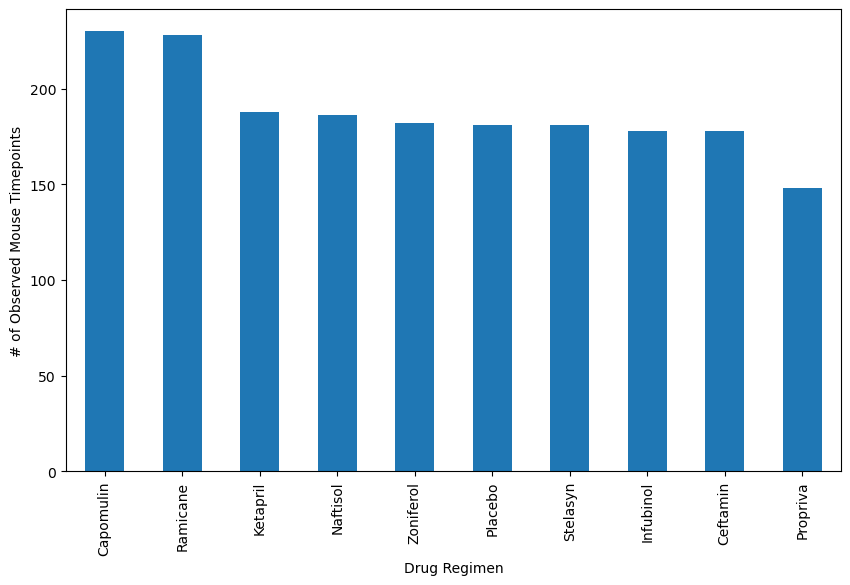

In [67]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
total_rows_regiem = cleaned_data["Drug Regimen"].value_counts()

total_rows_regiem.plot(kind="bar",figsize = (10,6))

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.show()


Text(0, 0.5, '# of Observed Mouse Timepoints')

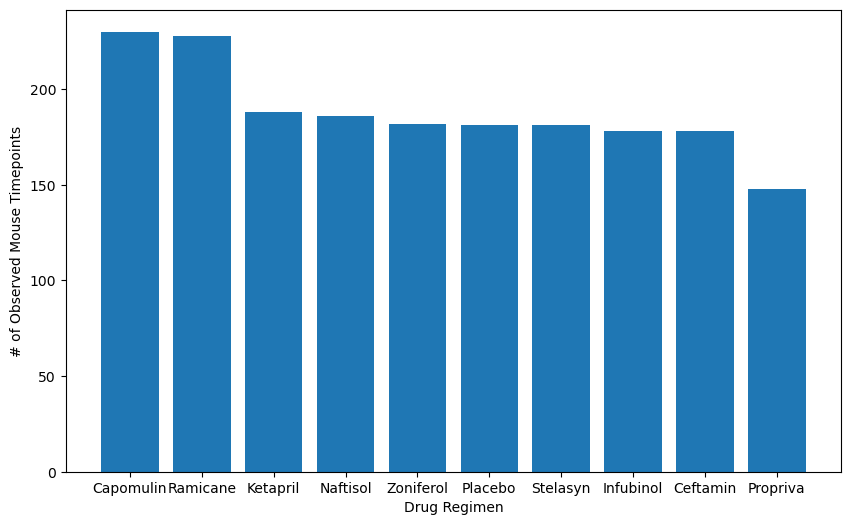

In [68]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
total_rows_regiem = cleaned_data["Drug Regimen"].value_counts()

plt.figure(figsize=(10,6))
plt.bar(total_rows_regiem.index, total_rows_regiem.values, align="center")

plt.xlabel("Drug Regimen")
plt.ylabel ("# of Observed Mouse Timepoints")


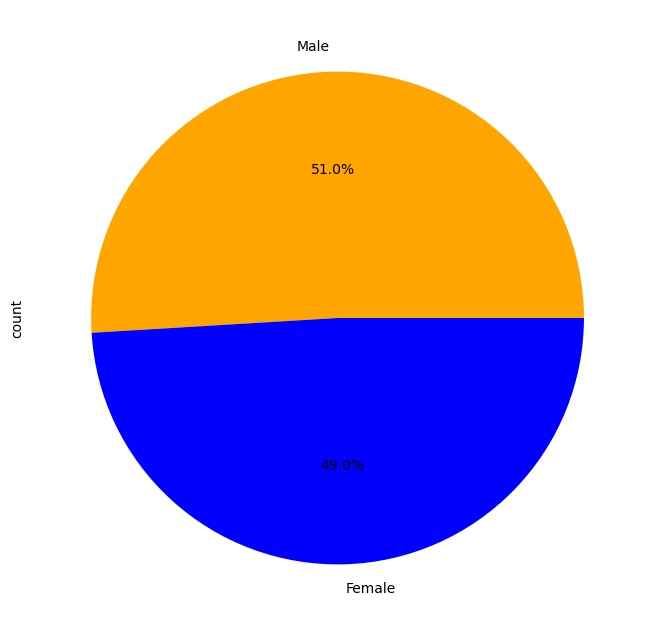

In [69]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_distribution = cleaned_data["Sex"].value_counts()
gender_distribution.plot(kind="pie", autopct='%1.1f%%',figsize=(8,8), colors=["orange","blue"])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

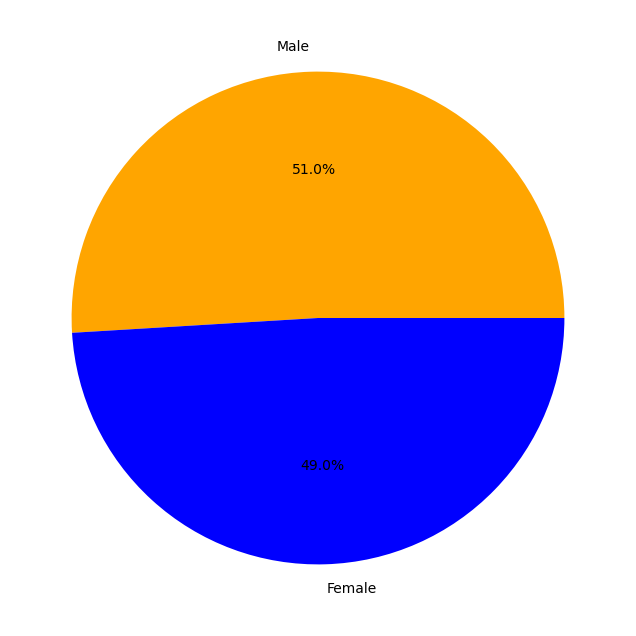

In [70]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(8,8))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%',colors=["orange","blue"])
plt.show

## Quartiles, Outliers and Boxplots

In [71]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regiems = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]
data_filtered = cleaned_data[cleaned_data["Drug Regimen"].isin(regiems)]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = data_filtered.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume=pd.merge(last_timepoint,cleaned_data,on=["Mouse ID","Timepoint"], how="left")

print(final_tumor_volume)

   Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0      a203         45    Infubinol  Female          20          23   
1      a251         45    Infubinol  Female          21          25   
2      a275         45     Ceftamin  Female          20          28   
3      a411         45     Ramicane    Male           3          22   
4      a444         45     Ramicane  Female          10          25   
..      ...        ...          ...     ...         ...         ...   
95     y769         45     Ceftamin  Female           6          27   
96     y793         45    Capomulin    Male          17          17   
97     y865         45     Ceftamin    Male          23          26   
98     z578         45     Ramicane    Male          11          16   
99     z581         45    Infubinol  Female          24          25   

    Tumor Volume (mm3)  Metastatic Sites  
0            67.973419                 2  
1            65.525743                 1  
2            62.99

In [72]:
# Put treatments into a list for for loop (and later for plot labels)
selected_regimens=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data =[]

#Create loop
for regiems in selected_regimens:
    # add subset 
    mice_on_regimen = final_tumor_volume[final_tumor_volume["Drug Regimen"]==regiems]
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes=mice_on_regimen["Tumor Volume (mm3)"]
    tumor_volume_data.append(tumor_volumes)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = tumor_volumes.quantile([0.25,0.75])
    lower_quartile= quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile

    
    # Determine outliers using upper and lower bounds
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    outliers = mice_on_regimen[(mice_on_regimen["Tumor Volume (mm3)"]<lower_bound)|(mice_on_regimen["Tumor Volume (mm3)"]>upper_bound)]

<function matplotlib.pyplot.show(close=None, block=None)>

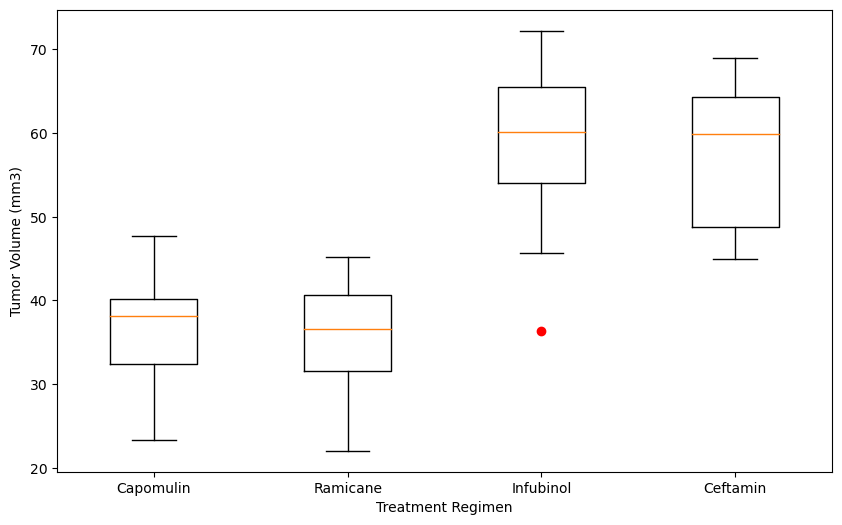

In [73]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(10,6))
plt.boxplot(tumor_volume_data,labels=selected_regimens, sym='r')
plt.xlabel("Treatment Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.show

## Line and Scatter Plots

<function matplotlib.pyplot.show(close=None, block=None)>

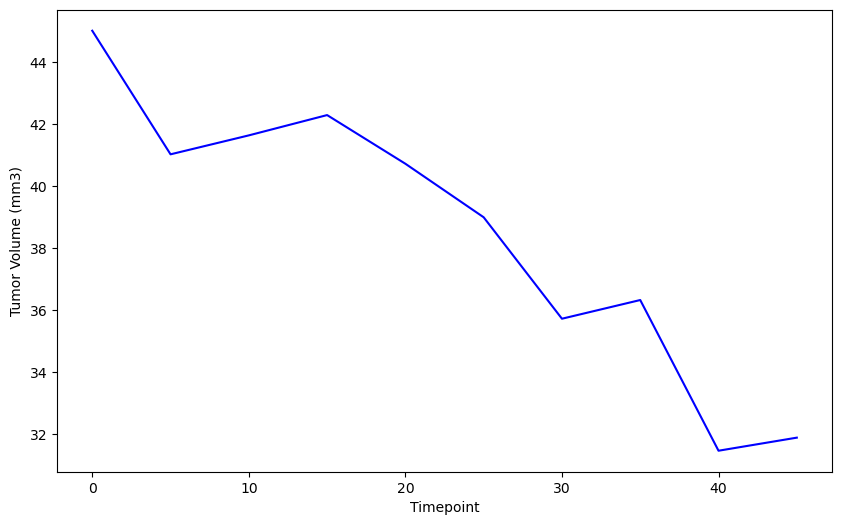

In [74]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
selected_mouse = "y793"
capomulin_data = cleaned_data[(cleaned_data["Drug Regimen"]=="Capomulin")& (cleaned_data["Mouse ID"] == selected_mouse)]

plt.figure(figsize=(10,6))
plt.plot(capomulin_data["Timepoint"], capomulin_data["Tumor Volume (mm3)"], color='b',linestyle = '-')
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show

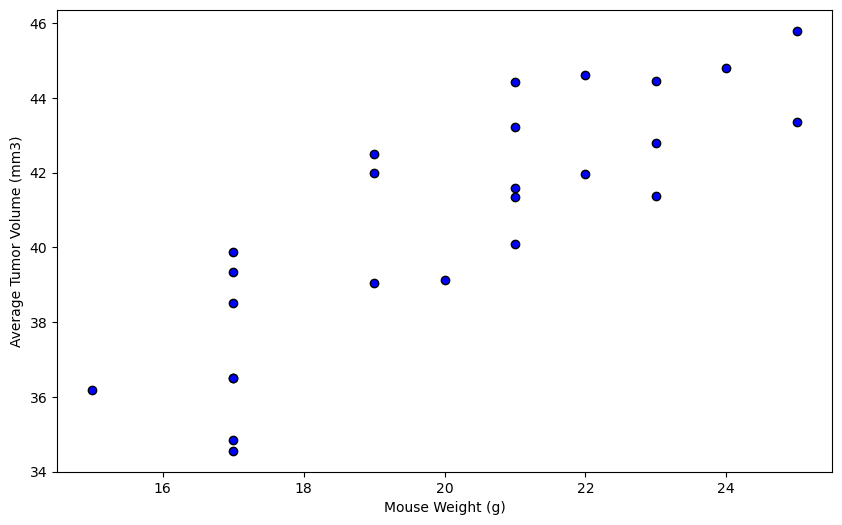

In [75]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = cleaned_data[(cleaned_data["Drug Regimen"]=="Capomulin")]
average_capomulin_mouses = capomulin_data.groupby("Mouse ID").agg({"Tumor Volume (mm3)":"mean","Weight (g)": "first"})

average_tumor_volume = average_capomulin_mouses["Tumor Volume (mm3)"]
mouse_weight = average_capomulin_mouses["Weight (g)"]

plt.figure(figsize=(10,6))
plt.scatter(mouse_weight, average_tumor_volume, marker='o',color='b', edgecolors= 'k')

plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

Correlation Coefficient: 0.8419363424694721
Linear Regression Equation: y = 0.95x + 21.55


Text(0.5, 1.0, 'Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')

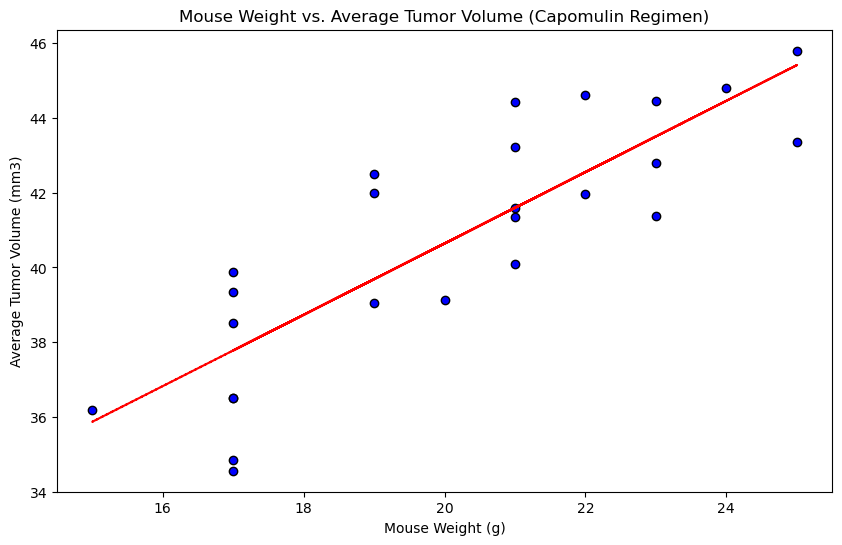

In [76]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation_coefficient = st.pearsonr(mouse_weight, average_tumor_volume)
print(f"Correlation Coefficient: {correlation_coefficient[0]}")

slope, intercept, r_value, p_value, std_err = st.linregress(mouse_weight, average_tumor_volume)

linear_regression_equation = f"y = {slope:.2f}x + {intercept:.2f}"
print(f"Linear Regression Equation: {linear_regression_equation}")

predicted_values = slope * mouse_weight + intercept

plt.figure(figsize=(10, 6))
plt.scatter(mouse_weight, average_tumor_volume, marker='o', color='b', edgecolors='k', label="Data Points")

# Plot the linear regression line
plt.plot(mouse_weight, predicted_values, color='r', linestyle='--', label=f"Linear Regression: y = {slope:.2f}x + {intercept:.2f}")

# Set plot labels and title
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")